In [1]:
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN 


Using TensorFlow backend.


In [2]:
os.chdir("C:/Users/tanis/Desktop/Data_Science/Edwisor/Project 2/Mine")
os.getcwd()
Gtest = pd.read_csv("test.csv", parse_dates=['pickup_datetime'])
Gtrain = pd.read_csv("train_cab.csv", parse_dates=['pickup_datetime'])

In [3]:
Gtrain.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16043,16067,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
unique,468,16021,NaN,NaN,NaN,NaN,NaN
top,6.5,2011-02-14 15:14:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,759,2,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,NaN,NaN,10.578384,6.826587,10.575062,6.187087,60.844122
min,NaN,NaN,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,NaN,NaN,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,NaN,NaN,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,NaN,NaN,-73.966838,40.767381,-73.963643,40.768013,2.000000


In [4]:
Gtrain.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [5]:
Gtrain.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
Gtrain.shape

(16067, 7)

# Changing Datatype 

In [7]:
Gtrain['fare_amount'] = pd.to_numeric(Gtrain['fare_amount'], errors='coerce')
Gtrain['pickup_datetime'] = pd.to_datetime(Gtrain['pickup_datetime'], errors='coerce')

# Data Cleaning

In [8]:
#Changing the values to its absolute for easier calculation further
Gtrain = Gtrain[abs(Gtrain["pickup_latitude"]) < 90] #One value is 401 deleting that
Gtrain = Gtrain[abs(Gtrain["dropoff_latitude"]) < 90] #non greater than 90
Gtrain = Gtrain[abs(Gtrain["pickup_longitude"]) < 180]
Gtrain = Gtrain[abs(Gtrain["dropoff_longitude"]) < 180]

#Gtrain.shape #(16066, 7)

In [9]:
#Deleting pasangers count where count > 8, as a cab can max hold 8 passengers and i want to avoid outliers so deleting it not imputing
index_pc = Gtrain.loc[Gtrain.passenger_count > 8,:].index
Gtrain.drop(index_pc, axis = 0, inplace = True)

In [10]:
#deleting values greater than 100 or negative
index_fc = Gtrain.loc[Gtrain.fare_amount > 100,:].index
Gtrain.drop(index_fc, axis = 0, inplace = True)

index_fc1 = Gtrain.loc[Gtrain.fare_amount < 0, :].index
Gtrain.drop(index_fc1, axis = 0, inplace = True)

In [11]:
Gtrain = Gtrain.dropna(subset=['fare_amount'])
Gtrain = Gtrain.dropna(subset=['pickup_datetime'])

In [12]:
#replacing all values that has 0 to nan so that we can impute them during missing value analysis
Gtrain=Gtrain.replace(0,np.nan)

In [13]:
Gtrain.shape

(16009, 7)

In [14]:
Gtrain.describe(include='all')

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16008.000000,16009,15699.000000,15699.000000,15700.000000,15702.000000,15897.000000
unique,NaN,15963,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-08 00:47:00+00:00,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN
first,NaN,2009-01-01 01:31:49+00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-06-30 22:42:39+00:00,NaN,NaN,NaN,NaN,NaN
mean,11.272607,NaN,-73.911639,40.689851,-73.906482,40.687787,1.649772
std,9.379828,NaN,2.655828,2.610141,2.707465,2.628960,1.266042
min,0.010000,NaN,-74.438233,-74.006893,-74.227047,-74.006377,0.120000
25%,6.000000,NaN,-73.992385,40.736570,-73.991373,40.736287,1.000000


In [15]:
#Datetime breakup and changinng the datatype to int(Feature Engineering)

Gtrain['year']=Gtrain['pickup_datetime'].dt.year
Gtrain['month']=Gtrain['pickup_datetime'].dt.month
Gtrain['weekday']=Gtrain['pickup_datetime'].dt.weekday
Gtrain['hour']=Gtrain['pickup_datetime'].dt.hour

In [16]:
Gtrain=Gtrain.drop('pickup_datetime',axis=1)

# Missing Value Analysis

In [17]:
############################################# Missing value Calculation #####################################################
total = Gtrain.isnull().sum().sort_values(ascending=False)
percent = ((Gtrain.isnull().sum()/Gtrain.isnull().count()).sort_values(ascending=False))*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data.sort_values('Total', ascending = True)
missing_data

,Total,Percent
hour,0,0.000000
weekday,0,0.000000
month,0,0.000000
year,0,0.000000
fare_amount,1,0.006246
passenger_count,112,0.699606
dropoff_latitude,307,1.917671
dropoff_longitude,309,1.930164
pickup_latitude,310,1.936411
pickup_longitude,310,1.936411


In [18]:
############################################Imputing missing value#####################################################
#I tried imputing these value from mean median mode but KNN is looking best for my project
Gtrain=pd.DataFrame(KNN(k=5).fit_transform(Gtrain),columns=Gtrain.columns, index=Gtrain.index)

Imputing row 1/16009 with 0 missing, elapsed time: 63.825
Imputing row 101/16009 with 0 missing, elapsed time: 63.915
Imputing row 201/16009 with 0 missing, elapsed time: 63.918
Imputing row 301/16009 with 0 missing, elapsed time: 63.919
Imputing row 401/16009 with 0 missing, elapsed time: 63.920
Imputing row 501/16009 with 0 missing, elapsed time: 63.921
Imputing row 601/16009 with 0 missing, elapsed time: 63.923
Imputing row 701/16009 with 0 missing, elapsed time: 63.925
Imputing row 801/16009 with 0 missing, elapsed time: 63.926
Imputing row 901/16009 with 0 missing, elapsed time: 63.929
Imputing row 1001/16009 with 0 missing, elapsed time: 63.933
Imputing row 1101/16009 with 0 missing, elapsed time: 63.934
Imputing row 1201/16009 with 0 missing, elapsed time: 63.935
Imputing row 1301/16009 with 0 missing, elapsed time: 63.937
Imputing row 1401/16009 with 0 missing, elapsed time: 63.939
Imputing row 1501/16009 with 0 missing, elapsed time: 63.940
Imputing row 1601/16009 with 0 missi

Imputing row 14801/16009 with 0 missing, elapsed time: 64.190
Imputing row 14901/16009 with 0 missing, elapsed time: 64.192
Imputing row 15001/16009 with 0 missing, elapsed time: 64.196
Imputing row 15101/16009 with 0 missing, elapsed time: 64.197
Imputing row 15201/16009 with 0 missing, elapsed time: 64.199
Imputing row 15301/16009 with 0 missing, elapsed time: 64.200
Imputing row 15401/16009 with 0 missing, elapsed time: 64.203
Imputing row 15501/16009 with 0 missing, elapsed time: 64.204
Imputing row 15601/16009 with 0 missing, elapsed time: 64.206
Imputing row 15701/16009 with 0 missing, elapsed time: 64.208
Imputing row 15801/16009 with 0 missing, elapsed time: 64.210
Imputing row 15901/16009 with 0 missing, elapsed time: 64.213
Imputing row 16001/16009 with 0 missing, elapsed time: 64.215


In [19]:
Gtrain['passenger_count']=Gtrain['passenger_count'].astype(int)
Gtrain['year']=Gtrain['year'].astype(int)
Gtrain['weekday']=Gtrain['weekday'].astype(int)
Gtrain['hour']=Gtrain['hour'].astype(int)
Gtrain['month']=Gtrain['month'].astype(int)

# Feature Engineering

In [20]:
Gtrain['abs_longi']=abs(Gtrain['pickup_longitude']-Gtrain['dropoff_longitude'])
Gtrain['abs_lat']=abs(Gtrain['pickup_latitude']-Gtrain['dropoff_latitude'])

In [21]:
#Calculatig distance from log and lati with great circle formula
def great_circle_distance(lon1,lat1,lon2,lat2):
    R = 6371000 # Approximate mean radius of earth (in m)
    
    # Convert decimal degrees to ridians
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Distance of lons and lats in radians
    dis_lon = lon2 - lon1
    dis_lat = lat2 - lat1
    
    # Haversine implementation
    a = np.sin(dis_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dis_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_m = R*c # Distance in meters
    dis_km = dis_m/1000 # Distance in km
    return dis_km
Gtrain['distance'] = great_circle_distance(Gtrain.pickup_longitude, Gtrain.pickup_latitude, Gtrain.dropoff_longitude, Gtrain.dropoff_latitude)
Gtrain.head(10)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17,0.002701,0.009041,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16,0.036780,0.070701,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0,0.008504,0.010708,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4,0.004437,0.024949,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7,0.011440,0.015754,1.999157
5,12.1,-74.000964,40.731630,-73.972892,40.758233,1,2011,1,3,9,0.028072,0.026603,3.787239
6,7.5,-73.980002,40.751662,-73.973802,40.764842,1,2012,11,1,20,0.006200,0.013180,1.555807
7,16.5,-73.951300,40.774138,-73.990095,40.751048,1,2012,1,2,17,0.038795,0.023090,4.155444
9,8.9,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,1,0.010882,0.024265,2.849627
10,5.3,-73.996335,40.737142,-73.980721,40.733559,1,2012,4,6,7,0.015614,0.003583,1.374577


# Vistualisation

In [22]:
##################################################### Univariate Analysis##########################################
import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so For Plots!
%matplotlib inline 

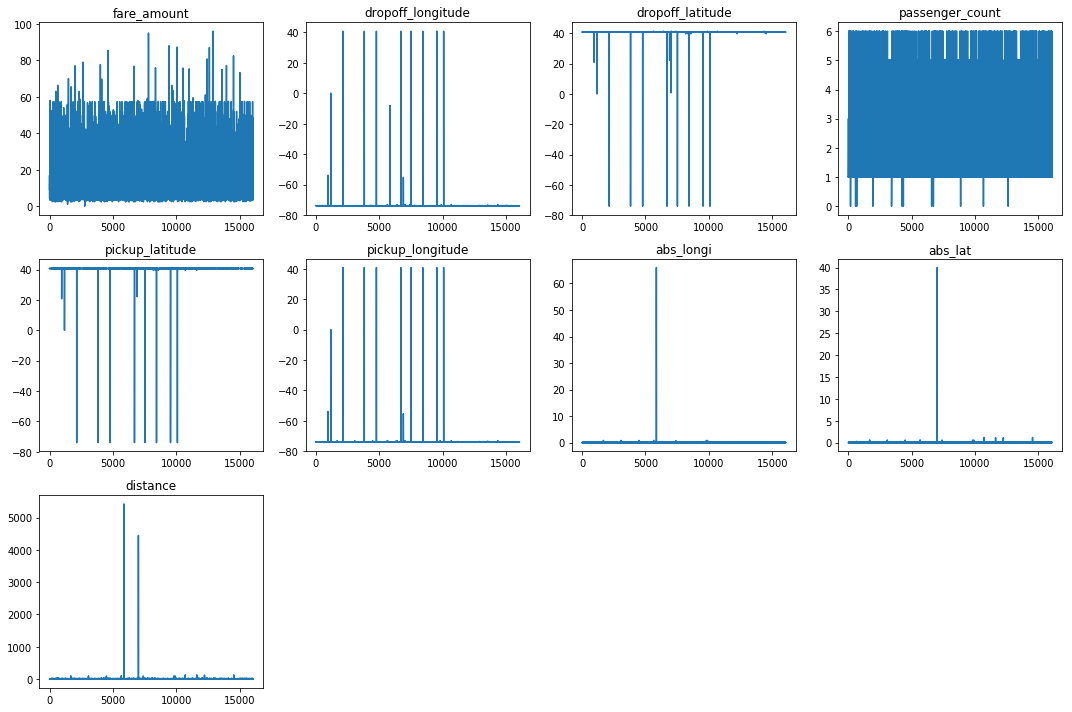

In [23]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 15
fig_size[1] = 10

plt.subplot(3,4,1)
plt.plot(Gtrain['fare_amount'])
plt.title('fare_amount')

plt.subplot(3,4,2)
plt.plot(Gtrain['dropoff_longitude'])
plt.title('dropoff_longitude')

plt.subplot(3,4,3)
plt.plot(Gtrain['dropoff_latitude'])
plt.title('dropoff_latitude')

plt.subplot(3,4,4)
plt.plot(Gtrain['passenger_count'])
plt.title('passenger_count')

plt.subplot(3,4,5)
plt.plot(Gtrain['pickup_latitude'])
plt.title('pickup_latitude')

plt.subplot(3,4,6)
plt.plot(Gtrain['pickup_longitude'])
plt.title('pickup_longitude')

plt.subplot(3,4,7)
plt.plot(Gtrain['abs_longi'])
plt.title('abs_longi')

plt.subplot(3,4,8)
plt.plot(Gtrain['abs_lat'])
plt.title('abs_lat')

plt.subplot(3,4,9)
plt.plot(Gtrain['distance'])
plt.title('distance')

plt.tight_layout()

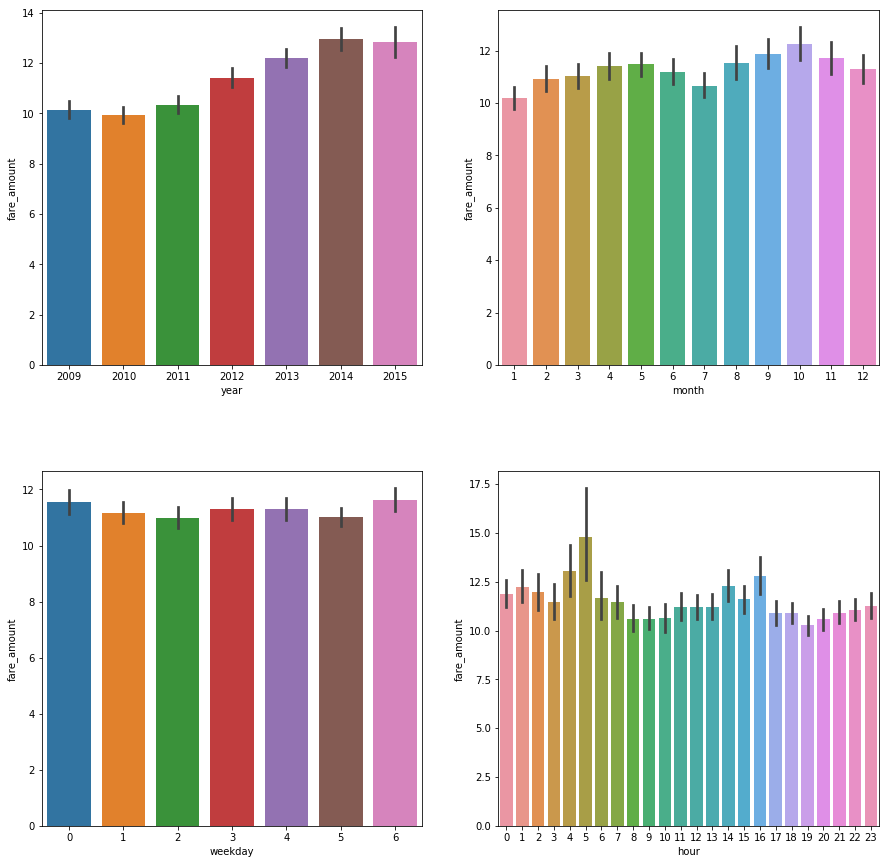

In [24]:
##################################################### Bi-variate Analysis##########################################
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=.3)
sns.barplot(x='year',y='fare_amount',data=Gtrain,ax=axarr[0][0])
sns.barplot(x='month',y='fare_amount',data=Gtrain,ax=axarr[0][1])
sns.barplot(x='weekday',y='fare_amount',data=Gtrain,ax=axarr[1][0])
sns.barplot(x='hour',y='fare_amount',data=Gtrain,ax=axarr[1][1])

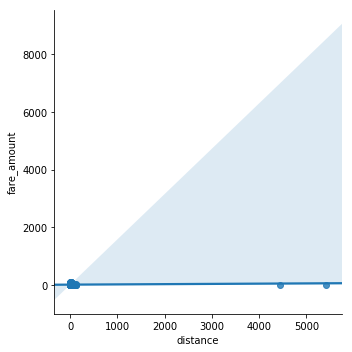

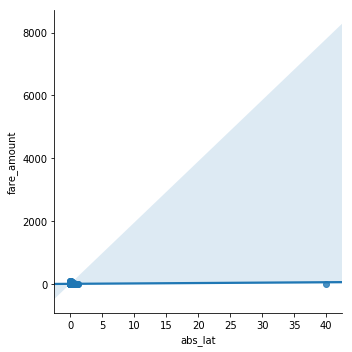

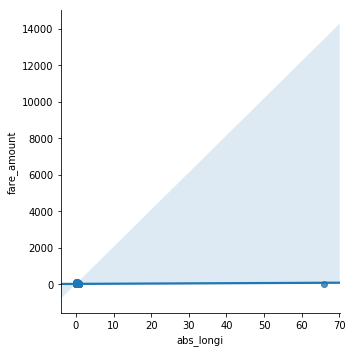

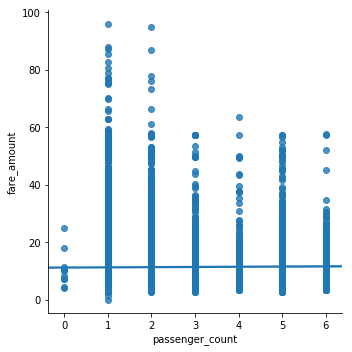

In [25]:
sns.lmplot(x='distance',y='fare_amount',data=Gtrain)
sns.lmplot(x='abs_lat',y='fare_amount',data=Gtrain)
sns.lmplot(x='abs_longi',y='fare_amount',data=Gtrain)
sns.lmplot(x='passenger_count',y='fare_amount',data=Gtrain)

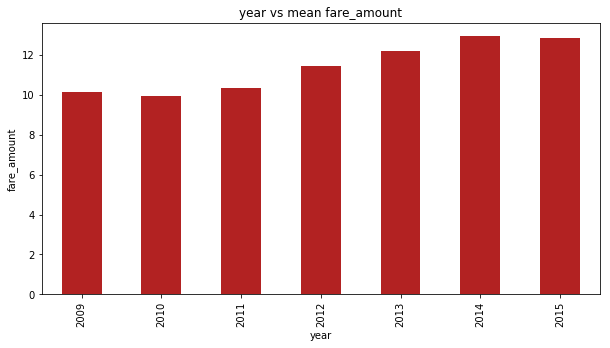

In [26]:
#Grouping mean fare_amount by year to check for any relationship in a bar plot
year = pd.pivot_table(Gtrain, values = 'fare_amount', index = 'year', aggfunc = ['mean'])
fig, ax = plt.subplots(figsize = (10,5))
year.plot(kind = 'bar', legend = False, color = 'firebrick', ax = ax)
ax.set(title = 'year vs mean fare_amount', ylabel= 'fare_amount')
plt.show()

# Outliers Analysis

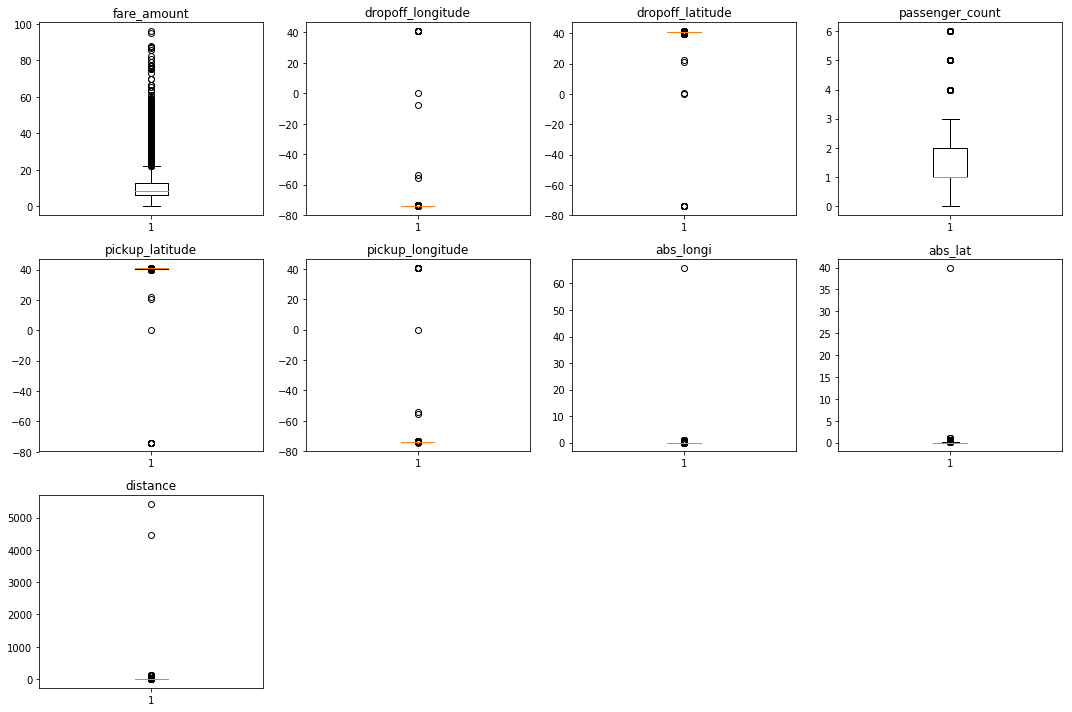

In [27]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 15
fig_size[1] = 10

plt.subplot(3,4,1)
plt.boxplot(Gtrain['fare_amount'])
plt.title('fare_amount')

plt.subplot(3,4,2)
plt.boxplot(Gtrain['dropoff_longitude'])
plt.title('dropoff_longitude')

plt.subplot(3,4,3)
plt.boxplot(Gtrain['dropoff_latitude'])
plt.title('dropoff_latitude')

plt.subplot(3,4,4)
plt.boxplot(Gtrain['passenger_count'])
plt.title('passenger_count')

plt.subplot(3,4,5)
plt.boxplot(Gtrain['pickup_latitude'])
plt.title('pickup_latitude')

plt.subplot(3,4,6)
plt.boxplot(Gtrain['pickup_longitude'])
plt.title('pickup_longitude')

plt.subplot(3,4,7)
plt.boxplot(Gtrain['abs_longi'])
plt.title('abs_longi')

plt.subplot(3,4,8)
plt.boxplot(Gtrain['abs_lat'])
plt.title('abs_lat')

plt.subplot(3,4,9)
plt.boxplot(Gtrain['distance'])
plt.title('distance')

plt.tight_layout()

# Feature Selection

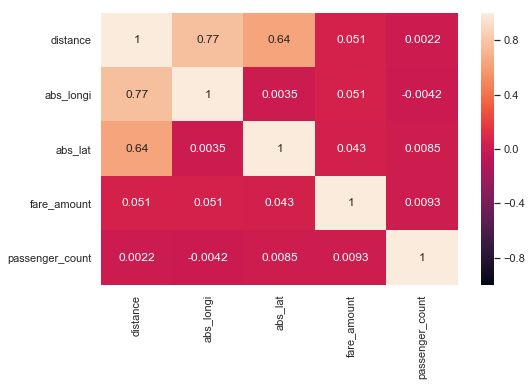

In [28]:
sns.set(rc={'figure.figsize':(8,5)})

Gtrain['passenger_count'] = Gtrain['passenger_count'].astype(int)
colname = ['distance','abs_longi','abs_lat','fare_amount','passenger_count']
heat_map = Gtrain[colname]
sns.heatmap(heat_map.corr(), vmin=-1.00, vmax=1.00, annot=True)

In [29]:
#considering taxi ride is limited to certain distance will keep this at 100Km
Gtrain = Gtrain[Gtrain["distance"] < 100]
Gtrain = Gtrain[Gtrain["distance"] > 0]

#Droping the 66.00839 from abs_longi and 39.99361 from abs_lat which is not contributing much but just a noice, which i understood from my visualization
Gtrain['abs_longi'] = Gtrain['abs_longi'].replace(66.00839, np.nan)
Gtrain['abs_lat'] = Gtrain['abs_lat'].replace(39.99361, np.nan)

Gtrain = Gtrain.dropna(subset=['abs_longi'])
Gtrain = Gtrain.dropna(subset=['abs_lat'])

Text(0, 0.5, 'Importance')

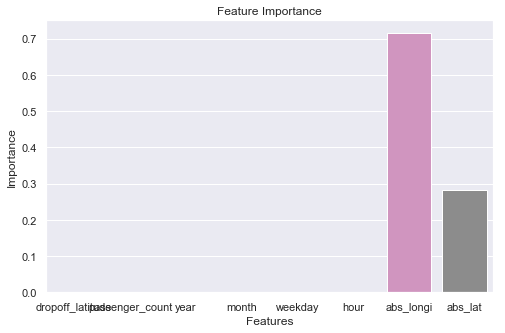

In [30]:
#Feature importance plotting
from sklearn.ensemble import RandomForestRegressor

names=list(Gtrain)
names = names[4:12]

fea = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(Gtrain.iloc[:,4:12],Gtrain.iloc[:,12])

sns.barplot(x = names ,y = fea.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

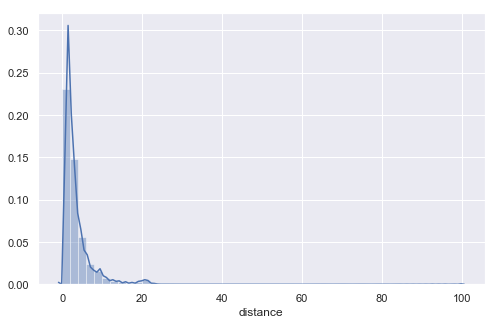

In [31]:
sns.distplot(Gtrain.distance)

# Modeling

In [32]:
#********************************** Modeling *****************************************************************
from sklearn import metrics
#function to check performance  
def performance(actual, predict):
    print('MSE:', metrics.mean_squared_error(actual, predict)) 
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, predict))) 
    print('MAPE:',np.mean(np.abs((actual-predict)/actual))*100)
    print('R-Sq:', metrics.r2_score(actual, predict))

In [33]:
#********************************** Sampling *****************************************************************
##Sampling: dividing  Test and train data  using sklearn 
from sklearn.model_selection import train_test_split,KFold, cross_val_score, cross_val_predict
import copy
#moving the amount to last variable
Gtrain['amount']= copy.copy(Gtrain['fare_amount'])
Gtrain = Gtrain.drop(['fare_amount'], axis=1)

#Random sample selection 
train, test = train_test_split(Gtrain, test_size = 0.20, random_state = 100)
Gtrain.shape, test.shape , train.shape, Gtest.shape

((15847, 13), (3170, 13), (12677, 13), (9914, 6))

Prediction with distance variable only

In [34]:
for col in train.columns: 
    print(col) 

pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
passenger_count
year
month
weekday
hour
abs_longi
abs_lat
distance
amount


In [35]:
#1. ############################################ Decision Tree ############################################################
###Model 1
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_depth =3, random_state=123).fit(train.iloc[:,11:12],train.iloc[:,12])
prediction_dt1 = dt1.predict(test.iloc[:,11:12])

#error matrix
performance(test.iloc[:,12],prediction_dt1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_dt1[1], test.iloc[1,12]

MSE: 21.078026663966604
RMSE: 4.591081208600715
MAPE: 25.940615726539818
R-Sq: 0.7741661461862904
                           
Perdicted Vs Actual value: 


(9.243938330410602, 9.7)

In [36]:
dt1.score(train.iloc[:,11:12],train.iloc[:,12])

0.7695354608376626

C:\Users\tanis\AnacondaNew\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


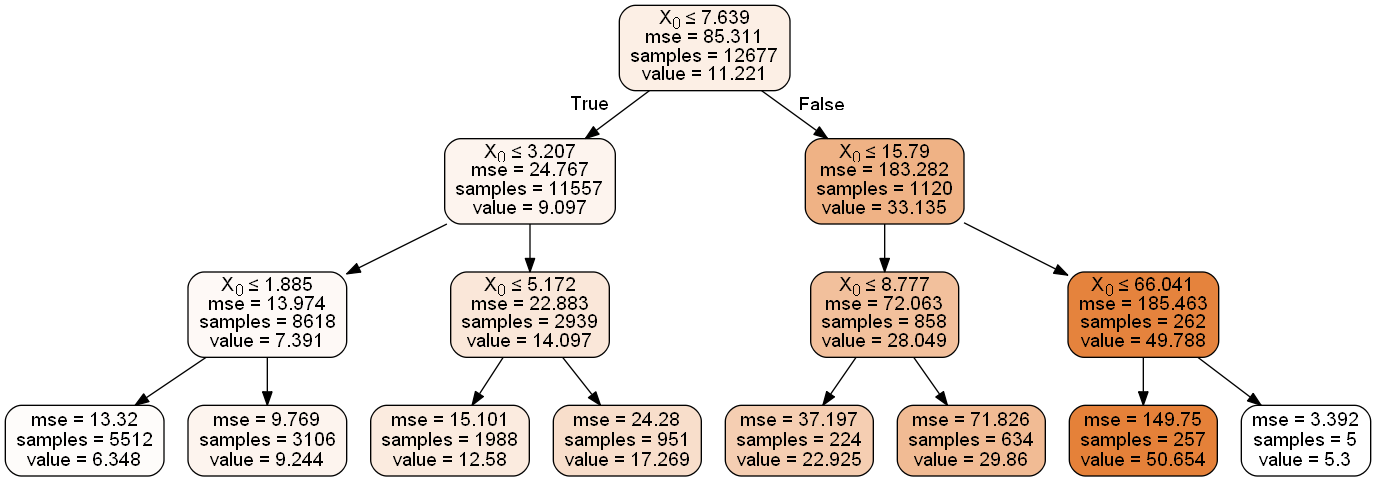

In [37]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
#2. ############################################ Random Forest ############################################################
###Model 2


rf1 = RandomForestRegressor(n_estimators = 500, random_state = 126).fit(train.iloc[:,11:12],train.iloc[:,12])
prediction_rf1 = rf1.predict(test.iloc[:,11:12])

#error matrix
performance(test.iloc[:,12],prediction_rf1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_rf1[1], test.iloc[1,12]

MSE: 28.352125990137548
RMSE: 5.324671444336969
MAPE: 28.80842963348389
R-Sq: 0.696230108337871
                           
Perdicted Vs Actual value: 


(10.46100000000001, 9.7)

In [39]:
rf1.score(train.iloc[:,11:12],train.iloc[:,12])

0.9573775997984604

In [40]:
#3. ############################################ Linear Regression ############################
###Model 3

from sklearn.linear_model import LinearRegression
#1.Simple Linear Regression Model 3


ln1 = LinearRegression().fit(train.iloc[:,11:12],train.iloc[:,12])
prediction_slr1 = ln1.predict(test.iloc[:,11:12])

#error matrix
performance(test.iloc[:,12],prediction_slr1)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr1[1], test.iloc[1,12]

MSE: 31.368014804894273
RMSE: 5.60071556186299
MAPE: 28.72551651107657
R-Sq: 0.6639173209708017
                           
Perdicted Vs Actual value: 


(10.762166378262915, 9.7)

In [41]:
ln1.score(train.iloc[:,11:12],train.iloc[:,12])

0.5949672994235145

In [42]:
#4. ############################################ Ridge Regression ############################
###Model 4
from sklearn import linear_model
#Ridge model


ln2 = linear_model.Ridge(alpha=.5).fit(train.iloc[:,11:12],train.iloc[:,12])
prediction_slr2 = ln2.predict(test.iloc[:,11:12])

#error matrix
performance(test.iloc[:,12],prediction_slr2)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr2[1], test.iloc[1,12]

MSE: 31.368035702181654
RMSE: 5.600717427453527
MAPE: 28.725582707960566
R-Sq: 0.6639170970734218
                           
Perdicted Vs Actual value: 


(10.762167506143257, 9.7)

In [43]:
ln2.score(train.iloc[:,11:12],train.iloc[:,12])

0.5949672994199122

Prediction with all variables ('passenger_count','abs_longi','abs_lat','year','month','weekday','hour','distance')

In [44]:
#5. ############################################ Decision Tree ############################################################
###Model 5
dt2 = DecisionTreeRegressor(max_depth =5, random_state=123).fit(train.iloc[:,4:12],train.iloc[:,12])
prediction_dt2 = dt2.predict(test.iloc[:,4:12])

#error matrix
performance(test.iloc[:,12],prediction_dt2)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_dt2[1], test.iloc[1,12]

MSE: 20.243696167210746
RMSE: 4.499299519615331
MAPE: 24.06285692278664
R-Sq: 0.7831053165574329
                           
Perdicted Vs Actual value: 


(10.635410764872521, 9.7)

In [45]:
dt2.score(train.iloc[:,4:12],train.iloc[:,12])

0.8273314842708335

In [46]:
#6. ############################################ Random Forest ############################################################
###Model 6

rf2 = RandomForestRegressor(n_estimators = 100, random_state = 126).fit(train.iloc[:,4:12],train.iloc[:,12])
prediction_rf2 = rf2.predict(test.iloc[:,4:12])

#error matrix
performance(test.iloc[:,12],prediction_rf2)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_rf2[1], test.iloc[1,12]

MSE: 17.781351758891226
RMSE: 4.216794014282797
MAPE: 22.88214811328376
R-Sq: 0.8094873273600888
                           
Perdicted Vs Actual value: 


(11.249999999999998, 9.7)

In [47]:
rf2.score(train.iloc[:,4:12],train.iloc[:,12])

0.9744232970794753

Text(0, 0.5, 'Importance')

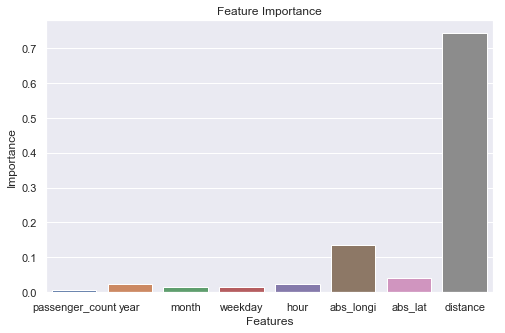

In [48]:
#Feature importance plotting
names=list(train)
names = names[4:12]

sns.barplot(x = names ,y = rf2.feature_importances_)  

plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')

In [49]:
#7. ############################################ Linear Regression ############################
###Model 7

ln3 = LinearRegression().fit(train.iloc[:,4:12],train.iloc[:,12])
prediction_slr3 = ln3.predict(test.iloc[:,4:12])

#error matrix
performance(test.iloc[:,12],prediction_slr3)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr3[1], test.iloc[1,12]

MSE: 26.61443150611335
RMSE: 5.158917668088273
MAPE: 26.94376004434763
R-Sq: 0.7148480865923952
                           
Perdicted Vs Actual value: 


(10.496673720682338, 9.7)

In [50]:
ln3.score(train.iloc[:,4:12],train.iloc[:,12])

0.6616051847614914

In [51]:
#8. ############################################ Ridge Regression ############################
###Model 8
ln4 = linear_model.Ridge(alpha=.5).fit(train.iloc[:,4:12],train.iloc[:,12])
prediction_slr4 = ln4.predict(test.iloc[:,4:12])

#error matrix
performance(test.iloc[:,12],prediction_slr4)
print('                           ')
print('Perdicted Vs Actual value: ')
prediction_slr4[1], test.iloc[1,12]

MSE: 27.80949915363504
RMSE: 5.273471262236577
MAPE: 27.879483241726582
R-Sq: 0.7020439120503217
                           
Perdicted Vs Actual value: 


(10.856777400601004, 9.7)

In [52]:
ln4.score(train.iloc[:,4:12],train.iloc[:,12])

0.6453463324712323

Text(0, 0.5, 'Predicted values')

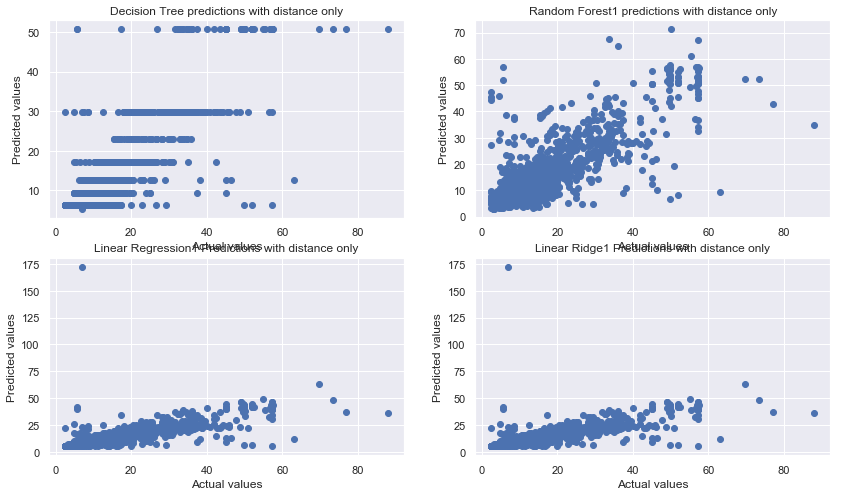

In [53]:
#Ploting to understand the spread of predicted data for modeling 

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.title('Decision Tree predictions with distance only')
plt.scatter(test.iloc[:,12],prediction_dt1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,2)
plt.title('Random Forest1 predictions with distance only')
plt.scatter(test.iloc[:,12] , prediction_rf1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,3)
plt.title('Linear Regression1 Predictions with distance only')
plt.scatter(test.iloc[:,12] , prediction_slr1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,4)
plt.title('Linear Ridge1 Predictions with distance only')
plt.scatter(test.iloc[:,12] , prediction_slr2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


Text(0, 0.5, 'Predicted values')

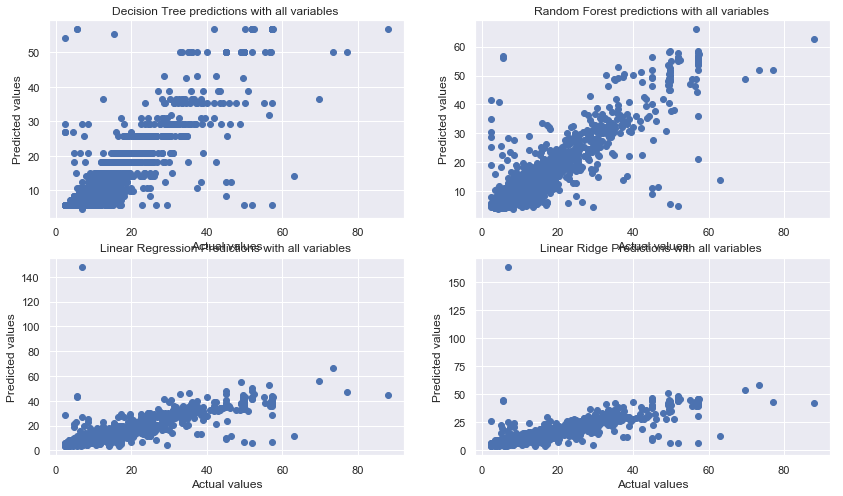

In [54]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.title('Decision Tree predictions with all variables ')
plt.scatter(test.iloc[:,12] , prediction_dt2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,2)
plt.title('Random Forest predictions with all variables ')
plt.scatter(test.iloc[:,12] , prediction_rf2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,3)
plt.title('Linear Regression Predictions with all variables ')
plt.scatter(test.iloc[:,12] , prediction_slr3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(2,2,4)
plt.title('Linear Ridge Predictions with all variables ')
plt.scatter(test.iloc[:,12] , prediction_slr4)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')


In [55]:
#As per comparision i am choosing Random forest with all varisbles predictor for my given test dataset

# Implementation on Test dataset

In [56]:
Gtest['pickup_datetime'] = pd.to_datetime(Gtest['pickup_datetime'], errors='coerce')
Gtest = Gtest.dropna(subset=['pickup_datetime'])

In [57]:
Gtest['year']=Gtest['pickup_datetime'].dt.year
Gtest['month']=Gtest['pickup_datetime'].dt.month
Gtest['weekday']=Gtest['pickup_datetime'].dt.weekday
Gtest['hour']=Gtest['pickup_datetime'].dt.hour

In [58]:
Gtest['abs_longi']=abs(Gtest['pickup_longitude']-Gtest['dropoff_longitude'])
Gtest['abs_lat']=abs(Gtest['pickup_latitude']-Gtest['dropoff_latitude'])

In [59]:
Gtest['distance'] = great_circle_distance(Gtest.pickup_longitude, Gtest.pickup_latitude, Gtest.dropoff_longitude, Gtest.dropoff_latitude)

In [60]:
Gtest.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,0.008110,0.019970,2.323259
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,0.012024,0.019817,2.425353
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.002870,0.005121,0.618628
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,0.009288,0.016172,1.961033
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,0.022519,0.045348,5.387301


In [61]:
Gtest.describe(include = 'all')

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance
count,9914,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
unique,1753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-12-13 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2009-01-01 11:04:24+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-06-30 20:03:50+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,2.852834,13.467420,0.023348,0.022133,3.435371
std,NaN,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,1.994451,6.868584,0.036719,0.025589,3.972374
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,1.000000,8.000000,0.006354,0.007279,1.298277


In [62]:
Gtest = Gtest.drop(['pickup_datetime','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'], axis=1)

In [63]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 127).fit(train.iloc[:,4:12],train.iloc[:,12])
amount = rf.predict(Gtest)

Gtest ['amount'] = amount

In [64]:
Gtest.head()

,passenger_count,year,month,weekday,hour,abs_longi,abs_lat,distance,amount
0,1,2015,1,1,13,0.008110,0.019970,2.323259,10.346
1,1,2015,1,1,13,0.012024,0.019817,2.425353,8.878
2,1,2011,10,5,11,0.002870,0.005121,0.618628,4.148
3,1,2012,12,5,21,0.009288,0.016172,1.961033,8.259
4,1,2012,12,5,21,0.022519,0.045348,5.387301,15.829


In [65]:
Gtest.to_csv("Fare_Amount_Predicted.csv")

PermissionError: [Errno 13] Permission denied: 'Fare_Amount_Predicted.csv'

Text(0.5, 1.0, 'fare_amount')

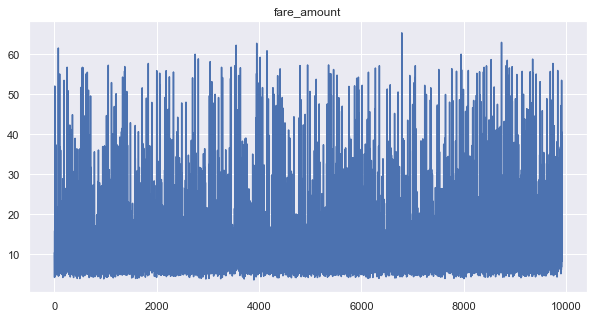

In [66]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 10
fig_size[1] = 5
plt.plot(Gtest['amount'])
plt.title('fare_amount')

In [ ]:
Gtest

# END OF PROJECT